### Домашнее задание.  

Дана статистика пользователей adult.csv.  
Получите значения AUC для различных моделей и их параметров.  
Используйте как минимум 3 различные модели классификации.  
Решением будет ссылка на гитхаб с ноутбуком.

Оффтопик для EDA и работы в pandas, интересная ссылка (как найти содержат ли ячейки определенные символы и вывести эти ячейки, например в наших данных встретится символ '?'):  
[Учимся фильтровать строки DataFrame (pandas) .str.contains()](http://pythonr.blogspot.com/2015/04/dataframe-pandas-strcontains.html)

#### Импорт библиотек

In [177]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

#### Загрузим данные

In [114]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [115]:
data.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7651,23,Private,132220,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
12352,54,State-gov,151580,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,40,United-States,>50K
12527,41,Self-emp-inc,163215,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,60,United-States,>50K
32978,61,Self-emp-not-inc,392694,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,>50K
8533,30,State-gov,185384,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,50,United-States,<=50K
38907,39,Private,122032,Assoc-voc,11,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
9701,48,Private,349986,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,50,United-States,>50K
5766,32,Private,220333,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,46,United-States,>50K
31540,60,Private,114263,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,Hungary,>50K
34310,44,Self-emp-not-inc,115896,Assoc-voc,11,Widowed,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K


In [116]:
data.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [118]:
data_columns = data.columns

In [119]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Видно, что пропусков нет. Имеются числовые и текстовые данные. Этот датасет не требует особого варева фичей, служит  определённой в задании цели. Правда некоторые категориальные фичи вместо пропусков имеют значение '?'.

In [120]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [121]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [122]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Заменим значение '?' значением, имеющим максимальное вхождение. Например:

In [123]:
data['workclass'].value_counts().index[0]

'Private'

Сам код для замены:

In [124]:
data.loc[data['workclass'] == '?', 'workclass'] = data['workclass'].value_counts().index[0]
data.loc[data['occupation'] == '?', 'occupation'] = data['occupation'].value_counts().index[0]
data.loc[data['native-country'] == '?', 'native-country'] = data['native-country'].value_counts().index[0]

Сделаем dummy-кодирование оставшихся  категориальных переменных

In [125]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                       'race', 'gender', 'native-country']
data = pd.get_dummies(data, columns = categorical_features)

###### Целевая переменная. 'income'

In [126]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Имеет два значения, присвоим самостоятельно каждому из значения нужный параметр '0' или '1':

In [127]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

Получили такой дата-сет:

In [128]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Разделим данные с помощью train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('income', axis=1), data['income'], test_size=0.3,
                                                   random_state=0)

In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34189, 105), (14653, 105), (34189,), (14653,))

---

Значения **AUC** для разных параметров модели **DecisionTreeClassifier**

In [131]:
max_depth = [5, 10, 20]
min_samples_leaf = [4, 8]
max_features = [50, 100]

In [132]:
params = []
curves = []
auc = []

In [133]:
for depth in max_depth:
    for samples_leaf in min_samples_leaf:
        for features in max_features:
            tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = samples_leaf,
                                          max_features = features, random_state = 55).fit(X_train, y_train)
            y_probas = tree.predict_proba(X_test)[:, 1]

            params.append((depth, samples_leaf, features))
            curves.append(roc_curve(y_test, y_probas))
            auc.append(roc_auc_score(y_test, y_probas))

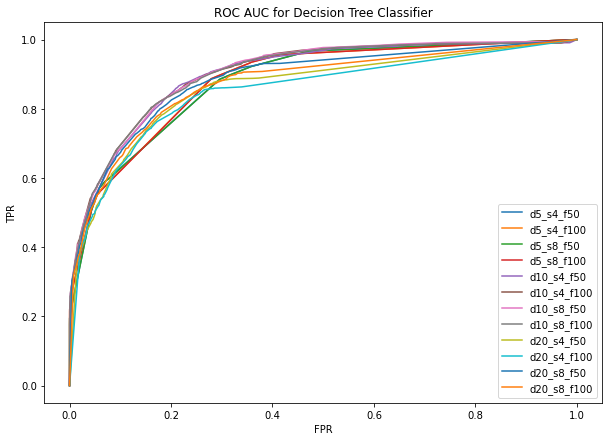

In [134]:
plt.figure(figsize=(10, 7))

for i in range(len(params)):
    plt.plot(curves[i][0], curves[i][1], label='d{}_s{}_f{}'.format(params[i][0], params[i][1], params[i][2]))

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC for Decision Tree Classifier')
plt.show()

In [135]:
for i in range(len(params)):
    print('d{}_s{}_f{}: {}'.format(params[i][0], params[i][1], params[i][2], auc[i]))

d5_s4_f50: 0.87972124954055
d5_s4_f100: 0.8821914622374878
d5_s8_f50: 0.8795895128667715
d5_s8_f100: 0.8819326887538134
d10_s4_f50: 0.899562670002889
d10_s4_f100: 0.9028491009083764
d10_s8_f50: 0.9037358809320137
d10_s8_f100: 0.9023129077419275
d20_s4_f50: 0.8612456503909188
d20_s4_f100: 0.850758325591755
d20_s8_f50: 0.8838940390144897
d20_s8_f100: 0.8721225530375807


Мы перебрали вручную несколько параметров, нас интересует оптимальный набор параметров с максимальным значеним **площади под кривой**.

In [136]:
max_index = np.argmax(auc)
print('Максимальное значение AUC при d{}_s{}_f{} : {}'.format(params[max_index][0], 
                                                              params[max_index][1], 
                                                              params[max_index][2],
                                                              auc[max_index]))

Максимальное значение AUC при d10_s8_f50 : 0.9037358809320137


Вблизи найденного максимума подключим автоматические методы!

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
params_GSCV = [ {'max_depth': list( range(7, 14) )}, {'min_samples_leaf': list( range(8, 11) )} , {'max_features': list( range(47, 54) )}]

Главное выбрать исследуемую метрику, в данном случае scoring = 'roc_auc'!

In [139]:
gs = GridSearchCV( DecisionTreeClassifier(), param_grid = params_GSCV, scoring = 'roc_auc', return_train_score = False )

Обучаем на тренировочных данных.

In [140]:
gs.fit( X_train, y_train )

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [7, 8, 9, 10, 11, 12, 13]},
        

In [142]:
gs.cv_results_

{'mean_fit_time': array([0.20913019, 0.2433219 , 0.25042262, 0.2767643 , 0.29787688,
        0.31380877, 0.33000741, 0.40301056, 0.40604534, 0.42253413,
        0.23726029, 0.2634275 , 0.25401564, 0.25162635, 0.26717744,
        0.26277299, 0.25286503]),
 'std_fit_time': array([0.00471586, 0.01550274, 0.0050059 , 0.00618619, 0.00330313,
        0.0080114 , 0.00392737, 0.0192913 , 0.01678333, 0.03322584,
        0.0181041 , 0.02681516, 0.01218185, 0.008908  , 0.02493543,
        0.02557927, 0.00506141]),
 'mean_score_time': array([0.00899768, 0.0093751 , 0.00878077, 0.0087986 , 0.00897889,
        0.00920243, 0.00910559, 0.00939116, 0.0095933 , 0.01098194,
        0.01018457, 0.0103838 , 0.01038775, 0.00998139, 0.00978336,
        0.0093874 , 0.00979633]),
 'std_score_time': array([6.33203928e-04, 1.01716791e-03, 4.01139253e-04, 3.69131406e-04,
        1.44878478e-05, 3.99501513e-04, 1.52062061e-04, 4.87357496e-04,
        4.90460001e-04, 2.51674745e-03, 9.88389764e-04, 1.35747287e-03,


In [143]:
gs.best_params_

{'max_depth': 8}

Выдал только значение оптимальное для одного из параметров.

---

Значения **AUC** для разных параметров модели **LogisticRegression**

In [170]:
penalty = ['l2', 'none']
C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [172]:
params = []
curves = []
auc = []

Создадим набор кривых для нашей задачи.

In [173]:
for p in penalty:
    for c in C:
        log_reg = LogisticRegression(C = c, penalty = p, random_state = 12).fit(X_train, y_train)
        y_probas = log_reg.predict_proba(X_test)[:, 1]
        
        params.append((p, c))
        curves.append(roc_curve(y_test, y_probas))
        auc.append(roc_auc_score(y_test, y_probas))

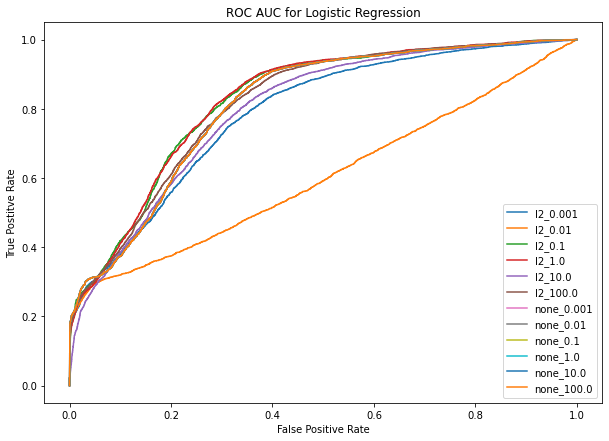

In [174]:
plt.figure(figsize=(10, 7))

for i in range(len(params)):
    plt.plot(curves[i][0], curves[i][1], label='{}_{}'.format(params[i][0], params[i][1]))

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('ROC AUC for Logistic Regression')
plt.show()

In [175]:
for i in range(len(params)):
    print('{}_{}: {}'.format(params[i][0], params[i][1], auc[i]))

l2_0.001: 0.7851066166676075
l2_0.01: 0.6026269173975934
l2_0.1: 0.8251544888680915
l2_1.0: 0.8263602338386624
l2_10.0: 0.7954594206344969
l2_100.0: 0.8146843671033027
none_0.001: 0.8117002600506207
none_0.01: 0.8117002600506207
none_0.1: 0.8117002600506207
none_1.0: 0.8117002600506207
none_10.0: 0.8117002600506207
none_100.0: 0.8117002600506207


In [176]:
max_index = np.argmax(auc)
print('Максимальное значение AUC при {}_{} : {}'.format(params[max_index][0], params[max_index][1], auc[max_index]))

Максимальное значение AUC при l2_1.0 : 0.8263602338386624


Значения **AUC** для разных параметров модели **RandomForestClassifier**

[Случайный лес (Random Forest)
](https://dyakonov.org/2016/11/14/%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9-%D0%BB%D0%B5%D1%81-random-forest/)

In [180]:
#n_estimators = [1, 3, 10, 1000]
#max_features = [1, 10, 100]
#min_samples_leaf = [1, 3, 30]
max_depth = [1, 5, 10]
criterion = ['gini', 'entropy']

In [ ]:
### RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [181]:
for m_d in max_depth:
    for cr in criterion:
        RFC = RandomForestClassifier(n_estimators=10, criterion = cr, max_depth = m_d, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None).fit(X_train, y_train)
        y_probas = RFC.predict_proba(X_test)[:, 1]
        
        params.append((m_d, cr))
        curves.append(roc_curve(y_test, y_probas))
        auc.append(roc_auc_score(y_test, y_probas))

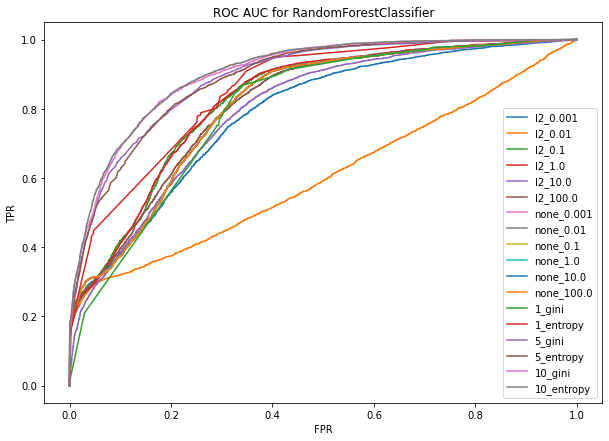

In [182]:
plt.figure(figsize=(10, 7))

for i in range(len(params)):
    plt.plot(curves[i][0], curves[i][1], label='{}_{}'.format(params[i][0], params[i][1]))

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC for RandomForestClassifier')
plt.show()

In [183]:
for i in range(len(params)):
    print('{}_{}: {}'.format(params[i][0], params[i][1], auc[i]))

l2_0.001: 0.7851066166676075
l2_0.01: 0.6026269173975934
l2_0.1: 0.8251544888680915
l2_1.0: 0.8263602338386624
l2_10.0: 0.7954594206344969
l2_100.0: 0.8146843671033027
none_0.001: 0.8117002600506207
none_0.01: 0.8117002600506207
none_0.1: 0.8117002600506207
none_1.0: 0.8117002600506207
none_10.0: 0.8117002600506207
none_100.0: 0.8117002600506207
1_gini: 0.8003347120452147
1_entropy: 0.8551047290592328
5_gini: 0.8898934280321849
5_entropy: 0.8882803402394938
10_gini: 0.9026019493707164
10_entropy: 0.905293515439436


In [184]:
max_index = np.argmax(auc)
print('Максимальное значение AUC при {}_{} : {}'.format(params[max_index][0], params[max_index][1], auc[max_index]))

Максимальное значение AUC при 10_entropy : 0.905293515439436
